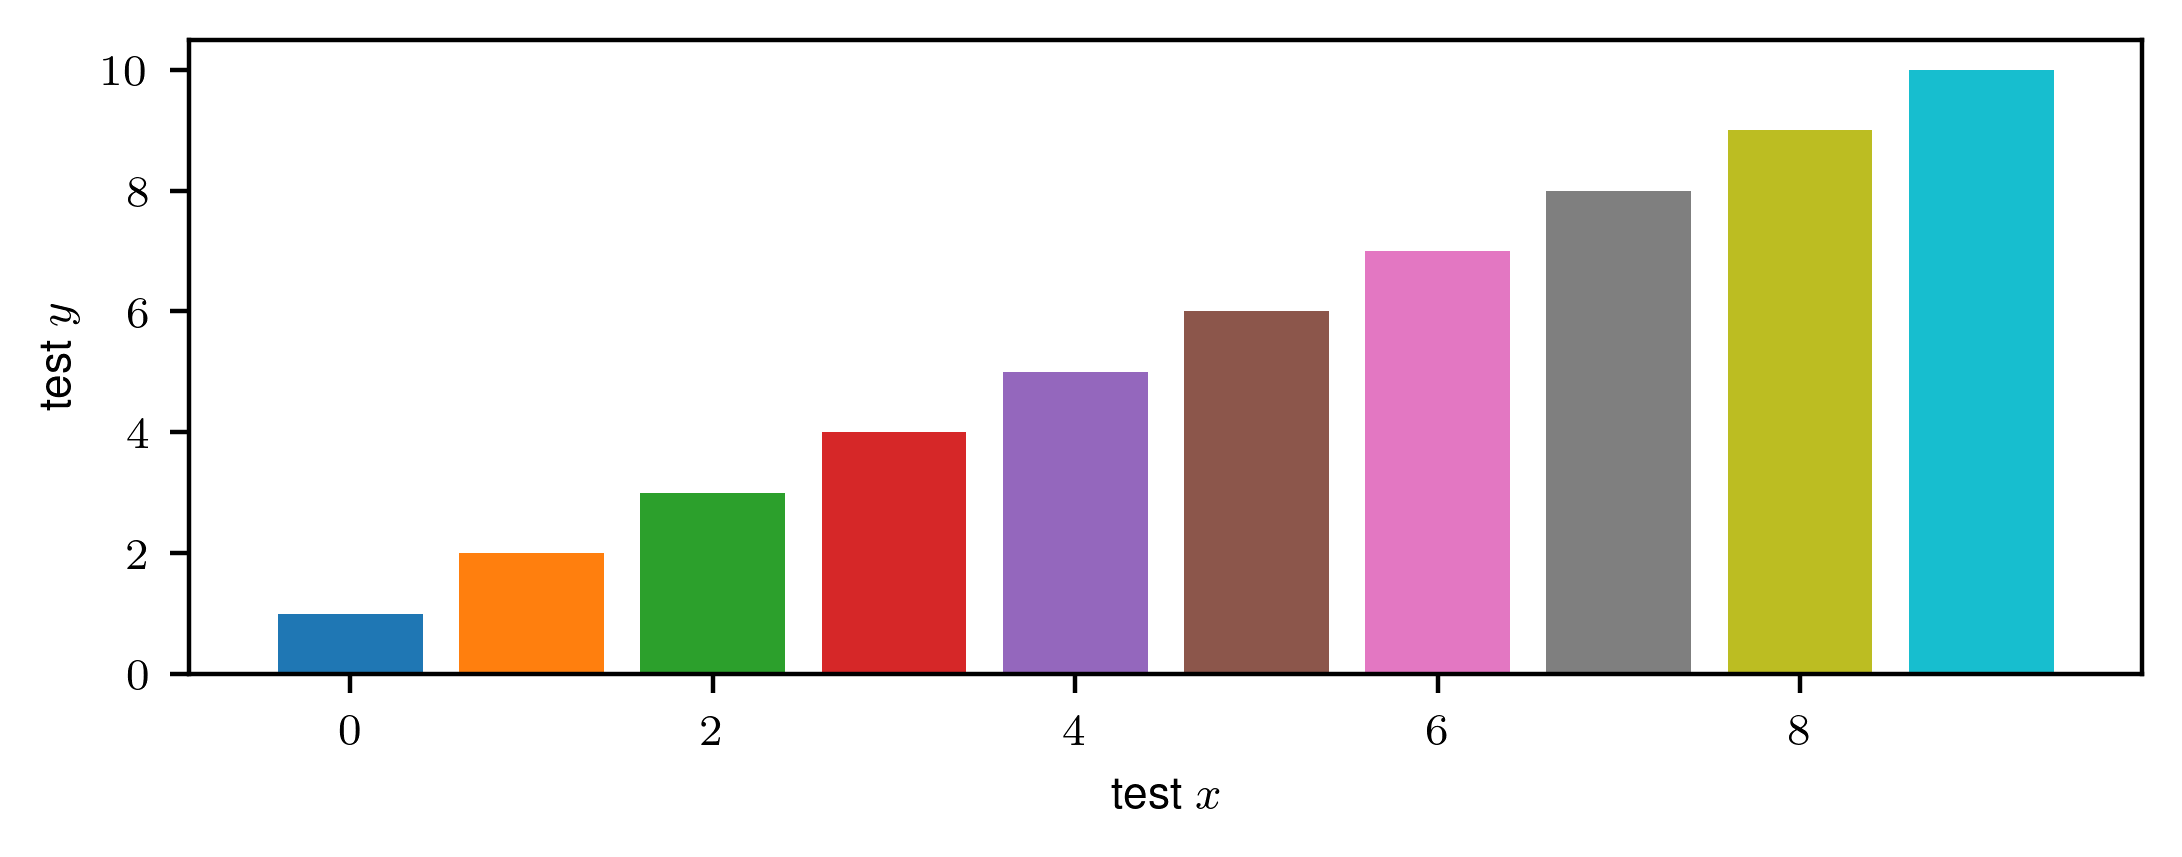

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines

text_width = 6.30107 # in  --> Confirmed with template explanation

fs_m1 = 8  # for figure ticks
fs = 8  # for regular figure text
fs_p1 = 9  # figure titles

matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title


matplotlib.rc('font', **{'family':'sans-serif', 'sans-serif': ['Helvetica']})
matplotlib.rc('text', usetex=True)

plt.figure(dpi=400, figsize=(text_width, text_width/3))
for i in range(10):
       plt.bar(i, i + 1, color=f'C{i}', zorder=2)
       # ^ This zorder nonsense makes the grid  lines go behid the bars. I don't know why this is needed for barplots, but shouldn't usually be needed.
# plt.title('\\textbf{Test}, $\\mathcal{C}, \\mathbb{R}$')
plt.xlabel('test $x$')
plt.ylabel('test $y$')
plt.show()

plt.style.use(['paper.mplstyle'])

In [2]:
scan_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_lin"
spectral_abscissas = [ 0.0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
skew_radii = [ 1.5, 2.0, 2.5, 3.0, 3.5, 4.7, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
soc_radii = [  0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 1.0, 1.1, 1.4, 1.6, 1.7, 1.8, 1.9, 2.1,0.9, 1.3, 2.2, 2.7]
small_soc_radii = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#, 5.0, 5.5, 6.0, 6.5, 10.0, 3.1, 3.4, 3.6, 3.8, 4.1, 4.2,4.3, 4.6, 4.9, 5.2, 5.3, 5.4, 5.7, 5.9]
rdn_radii = [0.0, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
n_targets = 8

p_0 = np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg_av/rdn_0.0_0.0_0")
print(p_0)
p_1 = np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg_av/soc_1.5_0.8_0")
print(p_1)

[0.00000e+00 0.00000e+00 1.66387e+03 2.37344e-01 0.00000e+00]
[1.50000e+00 5.63301e+01 1.04259e+03 7.96392e-01 8.00000e-01]


In [3]:
def get_all_pi_rads(dir, radii, typ):
    norms = []
    pis = []
    alphas = []
    betas = []
    gammas = []
    alphas_c = []
    for rad in radii :
        for sa in spectral_abscissas :
            loc_gammas, loc_alphas, loc_betas, loc_alphas_c, loc_norms, loc_pis = [], [], [], [], [], []
            for s in [0,1,2,4,5,6]:
                try : 
                    if typ == "rdn":
                        #gamma = np.loadtxt(f"{dir}/g_full_{typ}_{rad}_0.0_{s}_{n}")
                        res = np.loadtxt(f"{dir}/{typ}_{rad}_0.0_{s}")
                        alpha = np.loadtxt(f"{dir}/alphas_cbar_{typ}_{rad}_0.0_{s}")
                        alpha_c = np.loadtxt(f"{dir}/alphas_c_{typ}_{rad}_0.0_{s}")
                        beta = np.loadtxt(f"{dir}/betas_cbar_{typ}_{rad}_0.0_{s}")
                        #tr_obs =  np.loadtxt(f"{dir}/tr_obs_{typ}_{rad}_0.0_{s}_{n}")
                        
                    elif typ == "skew":
                        #gamma = np.loadtxt(f"{dir}/g_full_{typ}_{rad}_0.0_{s}_{n}")
                        res = np.loadtxt(f"{dir}/{typ}_{rad}_{sa}_{s}")
                        alpha = np.loadtxt(f"{dir}/alphas_cbar_{typ}_{rad}_{sa}_{s}")
                        alpha_c = np.loadtxt(f"{dir}/alphas_c_{typ}_{rad}_{sa}_{s}")
                        beta = np.loadtxt(f"{dir}/betas_cbar_{typ}_{rad}_{sa}_{s}")
                        #tr_obs = np.loadtxt(f"{dir}/tr_obs_{typ}_{rad}_0.0_{s}_{n}")
                    else :
                        #gamma = np.loadtxt(f"{dir}/g_full_{typ}_{rad}_0.8_{s}_{n}")
                        res = np.loadtxt(f"{dir}/{typ}_{rad}_{sa}_{s}")
                        alpha = np.loadtxt(f"{dir}/alphas_cbar_{typ}_{rad}_{sa}_{s}")
                        alpha_c = np.loadtxt(f"{dir}/alphas_c_{typ}_{rad}_{sa}_{s}")
                        beta = np.loadtxt(f"{dir}/betas_cbar_{typ}_{rad}_{sa}_{s}")
                        print(beta)
                        #tr_obs = np.loadtxt(f"{dir}/tr_obs_{typ}_{rad}_0.8_{s}_{n}")
                    if beta > 0 and alpha > 0:
                        loc_pis.append(res[3])
                        loc_norms.append(res[1])
                        abetas = beta*alpha
                        #alphas.append(np.sum(abetas))
                        loc_alphas.append(alpha*beta)
                        loc_betas.append(beta)
                        #loc_gammas.append(np.mean(gamma))
                        loc_alphas_c.append(alpha_c)
                except : 
                    assert True
            print(np.shape(loc_alphas)[0])
            if np.shape(loc_alphas)[0] > 2:  
                alphas.append(np.mean(loc_alphas)) 
                betas.append(np.mean(loc_betas))  
                gammas.append(np.mean(loc_gammas))  
                norms.append(np.mean(loc_norms))
                pis.append(np.mean(loc_pis))
                alphas_c.append(np.mean(loc_alphas_c))
    _, idces_unique = np.unique(np.asarray(pis), return_index = True)
    return np.asarray(norms)[idces_unique], np.asarray(pis)[idces_unique], np.asarray(alphas)[idces_unique], np.asarray(betas)[idces_unique], np.asarray(gammas)[idces_unique],  np.asarray(alphas_c)[idces_unique]


soc_norms_binned, prep_idces, soc_alphas_binned, soc_betas_binned, soc_gammas_binned, soc_alphas_c_binned   = get_all_pi_rads(scan_dir, soc_radii, "soc")
print(soc_norms_binned)



0
0
0.000100655
8.08192e-05
9.65847e-05
7.61477e-05
0.000102458
5
0


/home/mmcs3/.virtualenvs/why-prep/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mmcs3/.virtualenvs/why-prep/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.000211147
0.000271993
0.000298823
0.000199019
0.000269002
0.000175998
6
0.000284324
0.000436509
0.000507265
0.000391091
0.000590806
0.000443415
6
0.000614726
0.000638432
0.000594401
0.000534705
0.000718768
0.000760486
6
0.00105921
0.00125058
0.0011843
0.000949932
0.000916983
0.00120811
6
0.0138128
0.00411364
0.000795269
0.00249952
0.00451849
0.00251903
6
0
0
0
0.000129768
0.000115143
0.00013928
0.000139046
0.000118535
0.000132733
6
0.000110153
0.000116027
0.000207351
3
0.000380036
0.000337813
0.000307886
3
0.000735596
0.000511083
0.000804114
3
0.0011709
0.000932322
0.000994011
3
-0.0833815
0.00166307
0.0161479
2
0
0
0
0
0.000137362
0.000139029
0.000161314
0.000161678
0.000160362
0.000150706
6
0.000172877
0.000244805
0.000298171
0.000272064
0.000165401
0.000134709
6
0.000548808
0.000605717
0.000575244
0.000629859
0.00041079
0.000359107
6
0.00102947
0.00131775
0.0010455
0.000958856
0.00118177
0.00108543
6
0.00174857
0.0021854
0.00298907
0.00288665
0.00415491
0.00234972
6
0
0
0
0
0.0002

In [4]:
rdn_norms_binned, prep_idces_rdn, rdn_alphas_binned, rdn_betas_binned, rdn_gammas_binned, rdn_alphas_c_binned = get_all_pi_rads(scan_dir, rdn_radii, "rdn")

print(np.shape(rdn_norms_binned))
assert np.shape(rdn_norms_binned)[0] > 0 



#small_soc_norms_binned, small_prep_idces, small_soc_alphas_binned, small_soc_betas_binned, small_soc_gammas_binned, small_soc_alphas_c_binned   = get_all_pi_rads("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg_small_av", small_soc_radii, "soc")

skew_norms_binned, prep_idces_skew, skew_alphas_binned, skew_betas_binned, skew_gammas_binned, skew_alphas_c_binned  = get_all_pi_rads(scan_dir, skew_radii, "skew")


np.save("binned/soc_alphas_c", soc_alphas_c_binned)
np.save("binned/soc_betas", soc_betas_binned)
np.save("binned/soc_norms", soc_norms_binned)
np.save("binned/rdn_alphas_c", rdn_alphas_c_binned)
np.save("binned/rdn_betas", rdn_betas_binned)
np.save("binned/rdn_norms",rdn_norms_binned)
np.save("binned/skew_alphas_c", skew_alphas_c_binned)
np.save("binned/skew_betas", skew_betas_binned)
np.save("binned/skew_norms",skew_norms_binned)
np.save("binned/skew_pis",prep_idces_skew)
np.save("binned/rdn_pis",prep_idces_rdn)
np.save("binned/soc_pis",prep_idces)


# soc_betas_binned = soc_norms_binned
# soc_alphas_c_binned = soc_norms_binned
# skew_betas_binned = skew_norms_binned
# skew_alphas_c_binned = skew_norms_binned
# rdn_betas_binned = rdn_norms_binned
# rdn_alphas_c_binned = rdn_norms_binned


1
1
1
1
1
1
1
1
1
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
(9,)
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
0
0
0
0
0
0
0
0
0
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
0
0
0
0
0
0
0
0
0
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


[0.17285933 0.1759     0.182057   0.1892715  0.19978867 0.20992467
 0.22334933 0.2417405  0.2651465 ]


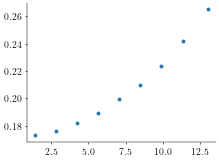

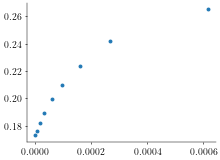

In [5]:
#plt.scatter(skew_norms, prep_idces_skew)
print(prep_idces_rdn)
plt.scatter(rdn_norms_binned, prep_idces_rdn)
plt.figure()
plt.scatter(rdn_betas_binned, prep_idces_rdn)
#plt.scatter(soc_norms, prep_idces)

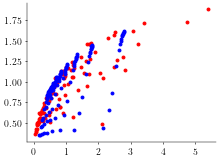

In [6]:
plt.scatter(soc_betas_binned/np.mean(soc_betas_binned), prep_idces, color = "red", label = "ISNs")
plt.scatter(skew_betas_binned/np.mean(skew_betas_binned),prep_idces_skew, color = "blue", label = "Skews")
#plt.scatter(rdn_betas/np.mean(rdn_betas), rdn_pis, color = "yellow", label = "Rdn")

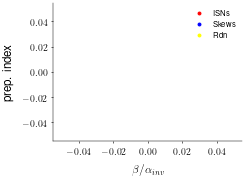

In [7]:
plt.scatter(soc_gammas_binned, prep_idces,color = "red", label = "ISNs")
plt.scatter(skew_gammas_binned, prep_idces_skew, color = "blue", label = "Skews")
plt.scatter(rdn_gammas_binned, prep_idces_rdn, color = "yellow", label = "Rdn")
plt.legend()
plt.xlabel("$\\beta/\\alpha_{inv}$")
plt.ylabel("prep. index")
plt.savefig("alpha_beta_summed.pdf")

<Figure size 245x183.75 with 0 Axes>

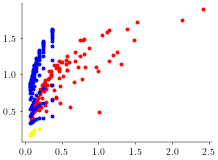

<Figure size 245x183.75 with 0 Axes>

In [8]:
plt.scatter(soc_alphas_c_binned, prep_idces,color = "red", label = "ISNs")
plt.scatter(skew_alphas_c_binned, prep_idces_skew, color = "blue", label = "Skews")
plt.scatter(rdn_alphas_c_binned, prep_idces_rdn, color = "yellow", label = "Rdn")
plt.figure()

In [9]:
def transfo_b(b):
    return b
def transfo_g(g):
    return g

def transfo_a(a):
    return a


def transfo_d(a):
    return 0*np.log(a)

def transfo_prep(p):
    p = np.asarray([pi for pi in p])
    return p


print(rdn_betas_binned <0)
print(np.min(prep_idces_rdn))
p_soc, p_skew, p_rdn = transfo_prep(prep_idces), transfo_prep(prep_idces_skew), transfo_prep(prep_idces_rdn)
g_soc, g_skew, g_rdn =transfo_g(soc_alphas_c_binned), transfo_g(skew_alphas_c_binned), transfo_g(rdn_alphas_c_binned)
a_soc, a_skew, a_rdn = transfo_a(soc_norms_binned), transfo_a(skew_norms_binned), transfo_a(rdn_norms_binned)
b_soc, b_skew, b_rdn = transfo_b(soc_betas_binned), transfo_b(skew_betas_binned), transfo_b(rdn_betas_binned)
all_prep_idces = np.concatenate([p_soc, p_skew, p_rdn])[:,None]
all_gammas = np.concatenate([g_soc, g_skew, g_rdn])
all_alphas = np.concatenate([a_soc, a_skew, a_rdn])
all_betas = np.concatenate([b_soc, b_skew, b_rdn])
n = all_prep_idces.shape[0]
shuffled_idces = np.random.permutation(np.arange(n))
train_idces, test_idces = shuffled_idces[:int(n/2)], shuffled_idces[int(n/2):]
all_abg = np.concatenate([all_betas[:,None], all_alphas[:,None], all_gammas[:,None]], axis=1)
all_abg_soc = np.concatenate([b_soc[:,None],np.asarray(a_soc[:,None]), g_soc[:,None]], axis=1)
all_abg_skew = np.concatenate([b_skew[:,None],np.asarray(a_skew[:,None]), g_skew[:,None]], axis=1)
all_abg_rdn = np.concatenate([b_rdn[:,None],np.asarray(a_rdn[:,None]),g_rdn[:,None]], axis=1)
print(np.mean(all_gammas), np.mean(all_gammas), np.std(all_alphas), np.std(all_betas))

[False False False False False False False False False]
0.17285933333333334
0.3055406102222222 0.3055406102222222 26.155490765981643 0.0016840252321491515


(240, 3)


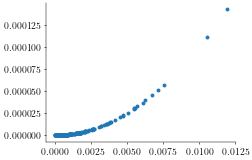

0.8734422889460356 [[ 6.58989113e+03 -2.66263682e-03 -3.11102353e+01  6.96884761e+06
  -2.69091000e+01 -6.72110271e+04 -1.06931741e-05  1.30392627e-01
   1.61512535e+02]]
[[ 6.58989113e+03 -2.66263682e-03 -3.11102353e+01  6.96884761e+06
  -2.69091000e+01 -6.72110271e+04 -1.06931741e-05  1.30392627e-01
   1.61512535e+02]]
(1, 9) (240, 9)
0.86304663629588


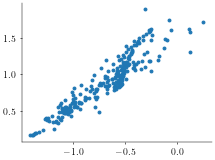

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(2, include_bias=False)
print(all_abg.shape)
features = poly.fit_transform(all_abg)
plt.scatter(all_abg[:,0], features[:,3])
plt.show()
plt.figure()
poly_reg_model = LinearRegression()
poly_reg_model.fit(features[train_idces,:], all_prep_idces[train_idces,:])
print(poly_reg_model.score(features[test_idces,:],all_prep_idces[test_idces,:]), poly_reg_model.coef_)
w_poly = poly_reg_model.coef_
print(w_poly)
b_poly = poly_reg_model.intercept_
print(w_poly.shape, features.shape)
pred_pis = features@w_poly.T
pis = all_prep_idces
r2 = 1 - np.var(pred_pis - pis)/np.var(pis)
print(r2)
plt.scatter(pred_pis, pis)
features_soc = poly.fit_transform(all_abg_soc)
features_skew = poly.fit_transform(all_abg_skew)
features_rdn = poly.fit_transform(all_abg_rdn)

(240,)
57.480407520833324 0.3055406102222222 0.0013188312434583333


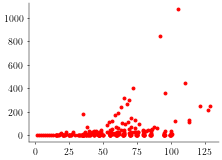

In [11]:
#order : beta, alpha, gamma
w_beta = np.array([w_poly[0,0], w_poly[0,3], w_poly[0,6], w_poly[0,7]])
w_alpha = np.array([w_poly[0,1], w_poly[0,4], w_poly[0,6], w_poly[0,8]])
w_gamma = np.array([w_poly[0,2], w_poly[0,5], w_poly[0,7],w_poly[0,8]])
print(all_betas.shape)
print(np.mean(all_alphas), np.mean(all_gammas), np.mean(all_betas))
beta_exp = np.concatenate([all_betas[None,:], all_betas[None,:]**2, all_betas[None,:]*0.02, all_betas[None,:]*0.3], axis=0)
alpha_exp = np.concatenate([all_alphas[None,:], all_alphas[None,:]**2, all_alphas[None,:]*0.001, all_alphas[None,:]*0.3], axis=0)
gamma_exp = np.concatenate([all_gammas[None,:], all_gammas[None,:]**2, all_gammas[None,:]*0.001, all_gammas[None,:]*0.02], axis=0)
#plt.scatter(all_alphas, w_alpha@alpha_exp, color = "b")
plt.scatter(all_alphas, w_beta@beta_exp, color = "r")
#plt.scatter(all_gammas, w_gamma@gamma_exp, color = "g")

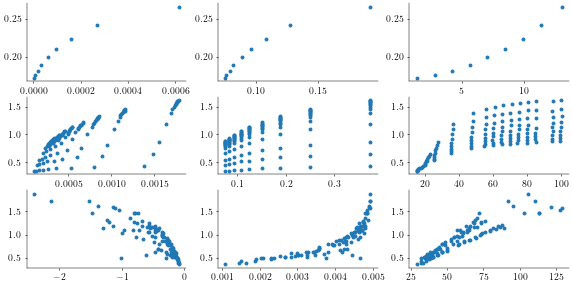

In [12]:
#visualize all of them independently
fig, axes = plt.subplots(3,3, figsize = (10, 5))

axes[0,0].scatter(b_rdn, p_rdn)
axes[0,1].scatter(g_rdn, p_rdn)
axes[0,2].scatter(a_rdn, p_rdn)
#############################
axes[1,0].scatter(b_skew, p_skew)
axes[1,1].scatter(g_skew, p_skew)
axes[1,2].scatter(a_skew, p_skew)
#############################
axes[2,0].scatter(b_soc - g_soc, p_soc)
axes[2,1].scatter(b_soc/g_soc, p_soc)
axes[2,2].scatter(a_soc, p_soc)

In [13]:
import scipy, sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
reg = LinearRegression()
cvs = cross_val_score(reg, all_abg, all_prep_idces, cv = cv)
print(cvs)
print(np.mean(cvs))


[0.81440213 0.82700795 0.80629337 0.82031652 0.79016068]
0.8116361321035448


0.8376018139724329 [[ 2.09071893e+03  2.62418836e-03 -9.96933149e+00]]
[[ 2.09071893e+03]
 [ 2.62418836e-03]
 [-9.96933149e+00]]
[1.0553751]
(125,) (106,) (9,)


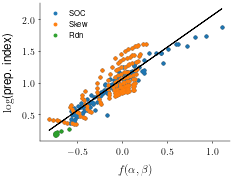

In [14]:
import scipy, sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(all_abg[train_idces,:], all_prep_idces[train_idces,:])
print(reg.score(all_abg[test_idces,:],all_prep_idces[test_idces,:]), reg.coef_)
#w = np.linalg.solve((all_abg.T@all_abg + 1E-6 * np.eye((np.shape(all_abg)[1]))), all_abg.T@all_prep_idces)
w = reg.coef_.T
print(w)
b = reg.intercept_
print(b)
plt.plot(all_abg@w, all_abg@w + b, 'k')
plt.scatter(all_abg@w, all_prep_idces, color='k')
plt.scatter(all_abg_soc@w, p_soc, label="SOC")
plt.scatter(all_abg_skew@w, p_skew, label = "Skew")
plt.scatter(all_abg_rdn@w, p_rdn, label = "Rdn")
plt.legend()
# plt.plot(all_abg@w, all_abg@w)
#plt.scatter(0,0,color= 'k')
plt.xlabel("$f(\\alpha, \\beta)$")
plt.ylabel("$\\log $(prep. index)")
plt.savefig("regression_ab_sum_g.pdf", bbox_inches="tight")
print(np.shape(p_skew), np.shape(p_soc), np.shape(p_rdn))

0.7419187197704736


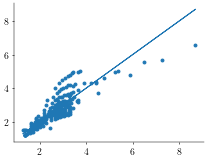

In [15]:
import scipy, sklearn
from sklearn.linear_model import LinearRegression
pred_pis = np.exp(all_abg@w + b)
pis = np.exp(all_prep_idces)
plt.scatter(pred_pis, pis)
plt.plot(pred_pis, pred_pis)
r2 = 1 - np.var(pred_pis - pis)/np.var(pis)
print(r2)

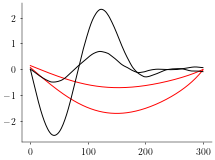

In [16]:
torque_tgt = np.loadtxt("/home/mmcs3/code/why-prep-2/tgt_torque")
torque_traj = np.loadtxt("/home/mmcs3/code/why-prep-2/torque_traj")
plt.plot(torque_traj, 'r')
plt.plot(torque_tgt, 'k')


In [17]:
######Analyses #########


def transfo_b(b):
    return b

def transfo_g(g):
    return g

def transfo_a(a):
    return 0*a + 1


def transfo_d(a):
    return 0*np.log(a)

def transfo_prep(p):
    p = np.asarray([pi for pi in p])
    return p

    
n = all_prep_idces.shape[0]
shuffled_idces = np.random.permutation(np.arange(n))
train_idces, test_idces = shuffled_idces[:int(n/2)], shuffled_idces[int(n/2):]
p_soc, p_skew, p_rdn = transfo_prep(prep_idces), transfo_prep(prep_idces_skew), transfo_prep(prep_idces_rdn)
g_soc, g_skew, g_rdn =transfo_g(soc_alphas_c_binned), transfo_g(skew_alphas_c_binned), transfo_g(rdn_alphas_c_binned)
a_soc, a_skew, a_rdn = transfo_a(soc_alphas_binned), transfo_a(skew_alphas_binned), transfo_a(rdn_alphas_c_binned)
b_soc, b_skew, b_rdn = transfo_b(soc_betas_binned), transfo_b(skew_betas_binned), transfo_b(rdn_betas_binned)
all_prep_idces = np.concatenate([p_soc, p_skew, p_rdn])[:,None]
z_prep_train = (all_prep_idces[train_idces,:] - np.mean(all_prep_idces[train_idces,:]))/np.std(all_prep_idces[train_idces,:])
z_prep_test = (all_prep_idces[test_idces,:] - np.mean(all_prep_idces[test_idces,:]))/np.std(all_prep_idces[test_idces,:])
z_prep= (all_prep_idces - np.mean(all_prep_idces))/np.std(all_prep_idces)
all_gammas = np.concatenate([g_soc, g_skew, g_rdn])
z_gamma_train = (all_gammas[train_idces] - np.mean(all_gammas[train_idces]))/np.std(all_gammas[train_idces])
z_gamma_test = (all_gammas[test_idces] - np.mean(all_gammas[test_idces]))/np.std(all_gammas[test_idces])
all_alphas = np.concatenate([a_soc, a_skew, a_rdn])
z_alpha_train = (all_alphas[train_idces] - np.mean(all_alphas[train_idces]))/np.std(all_alphas[train_idces])
z_alpha_test = (all_alphas[test_idces] - np.mean(all_alphas[test_idces]))/np.std(all_alphas[test_idces])
all_betas = np.concatenate([b_soc, b_skew, b_rdn])
z_beta_train = (all_betas[train_idces] - np.mean(all_betas[train_idces]))/np.std(all_betas[train_idces])
z_beta_test = (all_betas[test_idces] - np.mean(all_betas[test_idces]))/np.std(all_betas[test_idces])
z_abg_train = np.concatenate([z_beta_train[:,None], z_alpha_train[:,None], z_gamma_train[:,None]], axis=1)
z_b_train = np.concatenate([z_beta_train[:,None]], axis=1)
z_g_train = np.concatenate([z_gamma_train[:,None]], axis=1)
z_bg_train = np.concatenate([z_beta_train[:,None], z_gamma_train[:,None]], axis=1)
########
z_abg_test = np.concatenate([z_beta_test[:,None], z_alpha_test[:,None], z_gamma_test[:,None]], axis=1)
z_b_test = np.concatenate([z_beta_test[:,None]], axis=1)
z_g_test = np.concatenate([z_gamma_test[:,None]], axis=1)
z_bg_test = np.concatenate([z_beta_test[:,None], z_gamma_test[:,None]], axis=1)

print(np.mean(all_betas), np.std(all_betas), np.mean(all_gammas), np.std(all_gammas))
######
z_b = (all_betas - np.mean(all_betas))/np.std(all_betas)
z_g = (all_gammas - np.mean(all_gammas))/np.std(all_gammas)


cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
reg = LinearRegression()
reg_bg = LinearRegression().fit(z_bg_train, z_prep_train)
print(reg_bg.coef_, reg_bg.intercept_, reg_bg.score(z_bg_test, z_prep_test))


0.0013188312434583333 0.0016840252321491515 0.3055406102222222 0.3361263943925655
[[ 11.75823328 -11.23038321]] [1.37182803e-15] 0.7876410915524601


/tmp/ipykernel_685298/2309154455.py:37: RuntimeWarning: invalid value encountered in true_divide
  z_alpha_train = (all_alphas[train_idces] - np.mean(all_alphas[train_idces]))/np.std(all_alphas[train_idces])
/tmp/ipykernel_685298/2309154455.py:38: RuntimeWarning: invalid value encountered in true_divide
  z_alpha_test = (all_alphas[test_idces] - np.mean(all_alphas[test_idces]))/np.std(all_alphas[test_idces])


In [18]:
cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
reg = LinearRegression()
reg_bg = LinearRegression().fit(z_bg_train, z_prep_train)
score_bg = reg_bg.score(z_bg_test,z_prep_test)
print("bg : ", reg_bg.coef_, reg_bg.intercept_)
cvs = cross_val_score(reg, np.concatenate([z_bg_train, z_bg_test],axis=0),np.concatenate([z_prep_train, z_prep_test],axis=0), cv = cv)
print(cvs, np.mean(cvs), np.std(cvs))
mean_bg, sem_bg = np.mean(cvs), np.std(cvs)/np.sqrt(5)
reg_b = LinearRegression().fit(z_b_train, z_prep_train)
score_b = reg_b.score(z_b_test,z_prep_test)
print("b : ",reg_b.coef_, reg_b.intercept_)
cvs = cross_val_score(reg, np.concatenate([z_b_train, z_b_test],axis=0),np.concatenate([z_prep_train, z_prep_test],axis=0), cv = cv)
print(cvs, np.mean(cvs), np.std(cvs))
mean_b, sem_b = np.mean(cvs), np.std(cvs)/np.sqrt(5)
reg_g = LinearRegression().fit(z_g_train, z_prep_train)
score_g = reg_g.score(z_g_test,z_prep_test)
print("g : ",reg_g.coef_, reg_g.intercept_)
cvs = cross_val_score(reg, np.concatenate([z_g_train, z_g_test],axis=0),np.concatenate([z_prep_train, z_prep_test],axis=0), cv = cv)
print(np.mean(cvs), np.std(cvs))
mean_g, sem_g = np.mean(cvs), np.std(cvs)/np.sqrt(5)
print("Score \n")
print(score_b, score_g, score_bg)
reg_b_to_g = LinearRegression().fit(z_b_train, z_g_train)
score_b_to_g = reg_b_to_g.score(z_b_test,z_g_test)
print(score_b_to_g,reg_b_to_g.coef_)
print(scipy.stats.pearsonr(z_b, z_g))
z_b_soc = (b_soc - np.mean(all_betas))/np.std(all_betas)
z_b_skew = (b_skew - np.mean(all_betas))/np.std(all_betas)
z_b_rdn = (b_rdn - np.mean(all_betas))/np.std(all_betas)
z_g_soc = (g_soc - np.mean(all_gammas))/np.std(all_gammas)
z_g_skew = (g_skew - np.mean(all_gammas))/np.std(all_gammas)
z_g_rdn = (g_rdn - np.mean(all_gammas))/np.std(all_gammas)
z_prep_soc = (prep_idces - np.mean(all_prep_idces))/np.std(all_prep_idces)
z_prep_skew = (prep_idces_skew - np.mean(all_prep_idces))/np.std(all_prep_idces)
z_prep_rdn = (prep_idces_rdn - np.mean(all_prep_idces))/np.std(all_prep_idces)

w_bg = reg_bg.coef_
b_bg = reg_bg.intercept_
z_bg = np.concatenate([z_b[:,None], z_g[:,None]], axis=1)
z_bg_soc = np.concatenate([z_b_soc[:,None], z_g_soc[:,None]], axis=1)
z_bg_skew = np.concatenate([z_b_skew[:,None], z_g_skew[:,None]], axis=1)
z_bg_rdn = np.concatenate([z_b_rdn[:,None], z_g_rdn[:,None]], axis=1)

bg :  [[ 11.75823328 -11.23038321]] [1.37182803e-15]
[0.79004428 0.83273876 0.76739835 0.79395771 0.81657768] 0.800143357940829 0.022561190715523812
b :  [[0.55099482]] [-1.05738178e-16]
[0.28812009 0.4090797  0.32898916 0.3063525  0.35309509] 0.3371273071306903 0.04206457438202179
g :  [[0.50361747]] [-1.70287746e-16]
0.295004643549465 0.043752074931553454
Score 

0.3448951762672142 0.3039694434812332 0.7876410915524601
0.9974386499290223 [[0.9979391]]
(0.9983952470684776, 8.6805131662601e-299)


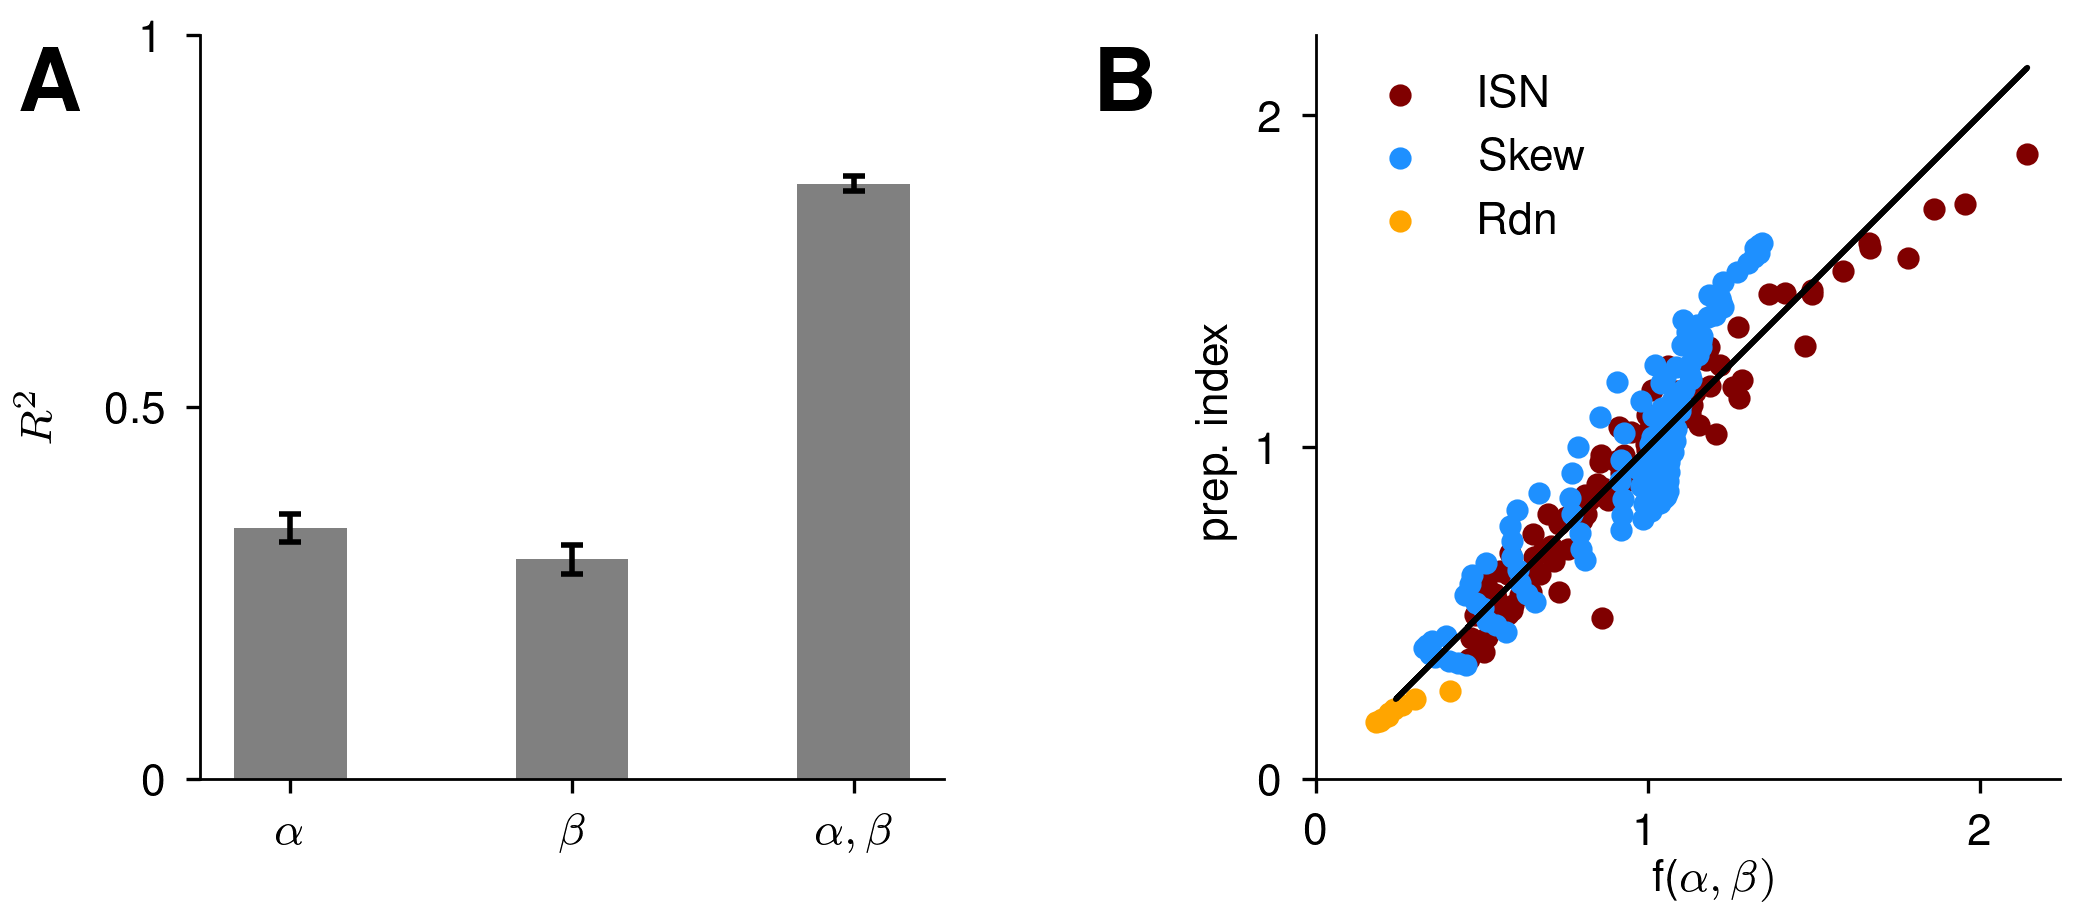

In [19]:
import scipy, sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(all_abg[train_idces,:], all_prep_idces[train_idces,:])
#w = np.linalg.solve((all_abg.T@all_abg + 1E-6 * np.eye((np.shape(all_abg)[1]))), all_abg.T@all_prep_idces)
w = reg.coef_.T
b = reg.intercept_
fig, axes = plt.subplots(1, 2, figsize = (6,3), dpi = 400)
plt.subplots_adjust(wspace = 0.5)
#ax_0 = axes[0]
#ax_0.set_box_aspect(1)
ax_1 = axes[0]
ax_1.set_box_aspect(1)
ax_2 = axes[-1]
pos2 = ax_2.get_position()
ax_2.set_box_aspect(1)
color_skew = "dodgerblue"
color_soc = "maroon"
color_rdn = "orange"
#####################
#ax_0.scatter(z_b_skew, z_prep_skew, color = color_skew, marker = "x")
#ax_0.scatter(z_b_soc, z_prep_soc, color = color_soc, marker = "x")
#ax_0.scatter(z_b_rdn, z_prep_rdn, color = color_rdn, marker = "x")
#ax_0.scatter(z_g_skew, z_prep_skew, color = color_skew, facecolors='none',marker = "o")
#ax_0.scatter(z_g_soc, z_prep_soc, color = color_soc, facecolors='none',marker = "o")
#ax_0.scatter(z_g_rdn, z_prep_rdn, color = color_rdn, facecolors='none',marker = "o")
#ax_0.scatter(z_g, z_prep)
"""ax_0.scatter(z_b_soc, z_g_soc, color = color_soc, marker = "o")
ax_0.scatter(z_b_skew, z_g_skew, color = color_skew,marker = "o")
ax_0.scatter(z_b_rdn, z_g_rdn, color = color_rdn,marker = "o")
ax_0.set_xticks([0, 2, 4], [0,2,4], size = fs_m1)
ax_0.set_yticks([0, 2, 4], [0,2,4], size = fs_m1)"""
#######################
ax_1.bar(0, mean_b, yerr=sem_b, width = 0.2, color='gray', ecolor='black', capsize=2,label="Prep.")
ax_1.bar(0.5, mean_g,  yerr=sem_g, width = 0.2, color='gray', ecolor='black', capsize=2,label="Move")
ax_1.bar(1, mean_bg,  yerr=sem_bg,width = 0.2, color='gray', ecolor='black', capsize=2,label="Move")
ax_1.set_xticks([0, 0.5, 1], ["$\\alpha$", "$\\beta$", "$\\alpha, \\beta$"], size = fs_m1)
ax_1.set_yticks([0, 0.5, 1], [0,0.5, 1], size = fs_m1)
#######################
ax_2.plot(all_abg@w + b, all_abg@w + b, 'k')
#ax_2.scatter(all_abg@w + b, all_prep_idces, color='k')
ax_2.scatter(all_abg_soc@w + b,prep_idces, label="ISN", color = color_soc)
ax_2.scatter(features_skew@w_poly.T + b_poly,p_skew, label = "Skew", color = color_skew)
ax_2.scatter(features_rdn@w_poly.T + b_poly,p_rdn, label = "Rdn", color = color_rdn)
ax_2.legend()
#axes[2,-1].axis('off')
ax_2.set_xticks([0, 1, 2], [0,1,2], size = fs_m1)
ax_2.set_yticks([0, 1, 2], [0,1,2], size = fs_m1)
########################
#fig.text(0.22, 0.2, "$\\textrm{z}_\\alpha$", size = fs)
#fig.text(0.08, 0.5, "$\\textrm{z}_\\beta$", size = fs, rotation = "vertical")
fig.text(0.73, 0.1, "f($\\alpha, \\beta)$", size = fs)
fig.text(0.54, 0.40, "prep. index", size = fs, rotation = "vertical")
fig.text(0.05, 0.48, "$R^2$", size = fs, rotation = "vertical")
#fig.text(0.05, 0.14, "natural \n output", size = fs, rotation = "vertical")
fig.text(0.05, 0.75, "$\\textbf{A}$", size = 16)
fig.text(0.5, 0.75, "$\\textbf{B}$", size = 16)
#fig.text(0.67, 0.75, "$\\textbf{C}$", size = 16)
plt.savefig("regression_ab.pdf", bbox_inches="tight")

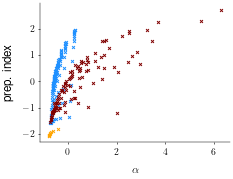

In [20]:
plt.scatter(z_b_skew, z_prep_skew, color = color_skew, marker = "x")
plt.scatter(z_b_soc, z_prep_soc, color = color_soc, marker = "x")
plt.scatter(z_b_rdn, z_prep_rdn, color = color_rdn, marker = "x")
plt.xlabel("$\\alpha$")
plt.ylabel("prep. index")
plt.savefig("alpha_prep.pdf", bbox_inches = "tight")

-0.3318458895090425 -0.34522953902206716 7.970273474547185 6.701168444763405


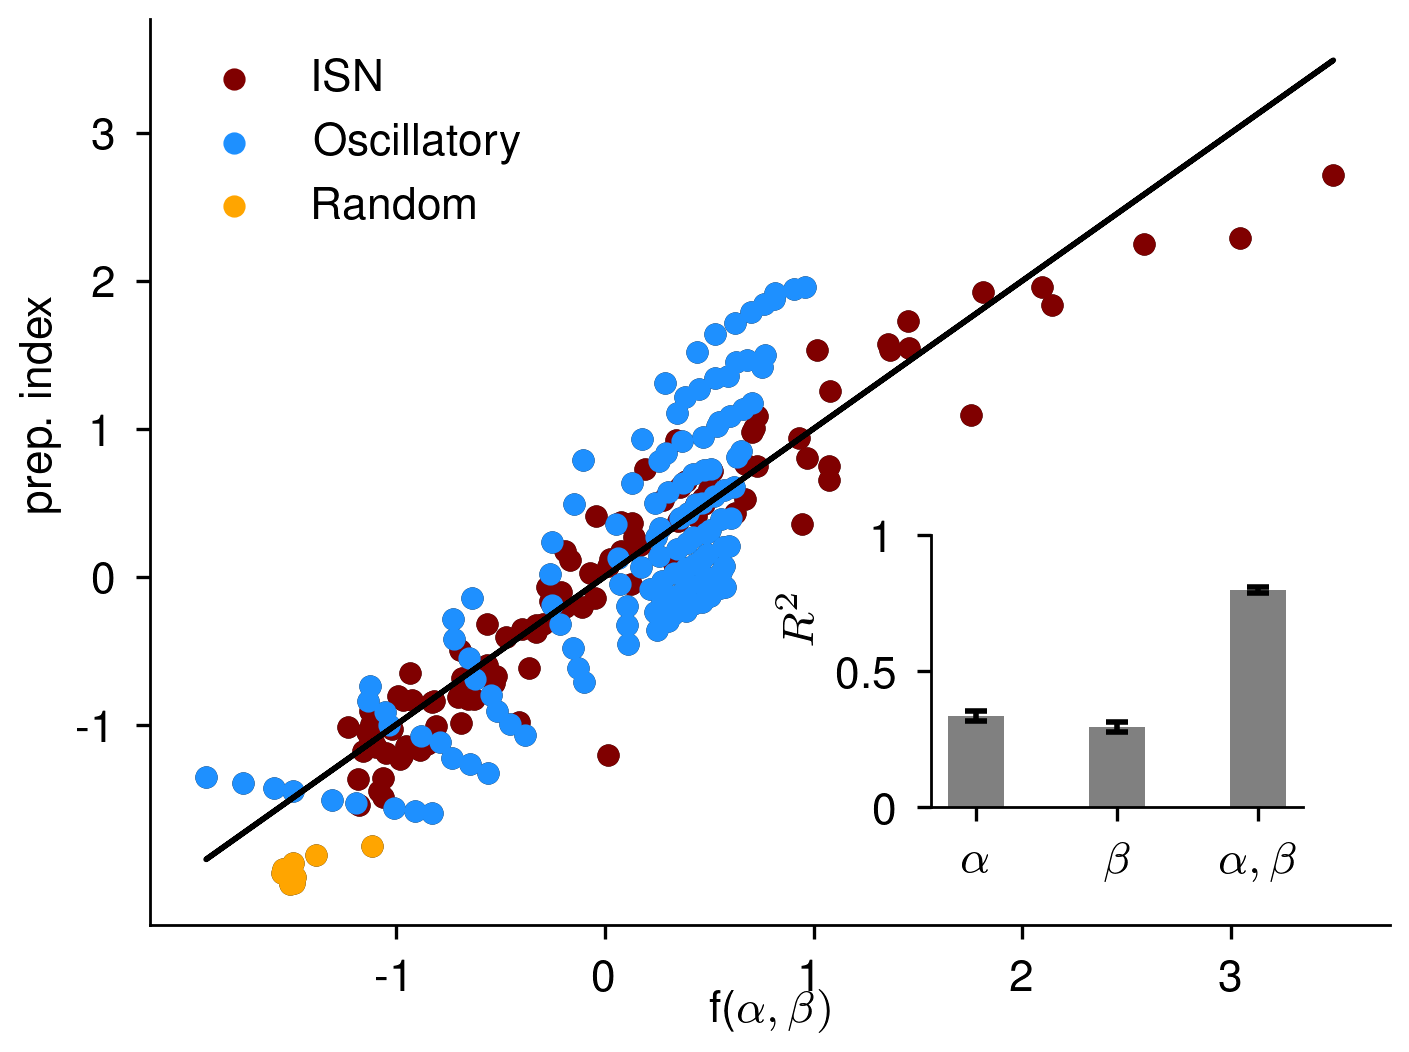

In [21]:
diff_dir = f"/home/mmcs3/code/why-prep-2/2D/2D_nets/nonnormal"
alphas_nn = np.loadtxt(f"{diff_dir}/alphas")
betas_nn = np.loadtxt(f"{diff_dir}/betas")
diff_dir = f"/home/mmcs3/code/why-prep-2/2D/2D_nets/skew"
alphas_skew = np.loadtxt(f"{diff_dir}/alphas")
betas_skew = np.loadtxt(f"{diff_dir}/betas")
all_alphas = np.concatenate([alphas_nn, alphas_skew])
all_betas = np.concatenate([betas_nn, betas_skew])
z_alphas_nn = (alphas_nn - np.mean(all_alphas))/np.std(all_alphas)
z_alphas_skew = (alphas_skew - np.mean(all_alphas))/np.std(all_alphas)
z_betas_nn = (betas_nn - np.mean(all_betas))/np.std(all_betas)
z_betas_skew = (betas_skew - np.mean(all_betas))/np.std(all_betas)
print(np.min(z_alphas_skew), np.min(z_betas_skew), np.max(z_alphas_nn), np.max(z_betas_nn))
#print("alphas nn", alphas_nn, "\n alphas skew : ", alphas_skew)
import scipy, sklearn
from sklearn.linear_model import LinearRegression
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable


cmap_yr = sns.color_palette("YlOrBr", as_cmap=True)
reg = LinearRegression().fit(all_abg[train_idces,:], all_prep_idces[train_idces,:])
#w = np.linalg.solve((all_abg.T@all_abg + 1E-6 * np.eye((np.shape(all_abg)[1]))), all_abg.T@all_prep_idces)
w = reg.coef_.T
b = reg.intercept_
plt.figure(figsize = (4,3), dpi = 400)
#####################
ax_1 =plt.gca().inset_axes([0.63, 0.13, 0.3, 0.3])
ax_1.bar(0, mean_b, yerr=sem_b, width = 0.2, color='gray', ecolor='black', capsize=2,label="Prep.")
ax_1.bar(0.5, mean_g,  yerr=sem_g, width = 0.2, color='gray', ecolor='black', capsize=2,label="Move")
ax_1.bar(1, mean_bg,  yerr=sem_bg,width = 0.2, color='gray', ecolor='black', capsize=2,label="Move")
ax_1.set_xticks([0, 0.5, 1], ["$\\alpha$", "$\\beta$", "$\\alpha, \\beta$"], size = fs_m1)
ax_1.set_yticks([0, 0.5, 1], [0,0.5, 1], size = fs_m1)
#######################
plt.plot(z_bg@w_bg.T + b_bg, z_bg@w_bg.T + b_bg, 'k')
plt.scatter(z_bg@w_bg.T + b_bg, z_prep, color='k')
plt.scatter(z_bg_soc@w_bg.T + b_bg,z_prep_soc, label="ISN", color = color_soc)
plt.scatter(z_bg_skew@w_bg.T + b_bg,z_prep_skew, label = "Oscillatory", color = color_skew)
plt.scatter(z_bg_rdn@w_bg.T + b_bg,z_prep_rdn, label = "Random", color = color_rdn)
plt.legend()
#axes[2,-1].axis('off')
plt.gca().set_xticks([-1, 0, 1,2,3], [-1, 0, 1,2,3], size = fs_m1)
plt.gca().set_yticks([-1, 0, 1,2,3], [-1, 0, 1,2,3], size = fs_m1)
########################
#fig.text(0.22, 0.2, "$\\textrm{z}_\\alpha$", size = fs)
#fig.text(0.08, 0.5, "$\\textrm{z}_\\beta$", size = fs, rotation = "vertical")
plt.text(0.5, -3, "f($\\alpha, \\beta)$", size = fs)
plt.text(-2.8, 0.5, "prep. index", size = fs, rotation = "vertical")
plt.text(0.85, -0.4, "$R^2$", size = fs, rotation = "vertical")
plt.savefig("test_full_reg.pdf", bbox_inches="tight")

score :  [ 18.30942716 -17.47673646] -1.87673676852761e-15 0.9289118945844846 0.6855909975219507
0.27531193180621016 0.045819652422543274
0.22713205193774444 0.04918470358684639
0.9035434320585545 0.014684343723007694


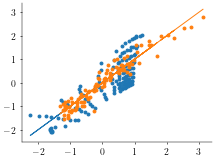

In [22]:
######Analyses #########


def transfo_b(b):
    return b

def transfo_g(g):
    return g


def transfo_prep(p):
    p = np.asarray([pi for pi in p])
    return p

#idx_rdn = np.argwhere()
p_soc, p_skew, p_rdn = transfo_prep(prep_idces), transfo_prep(prep_idces_skew), transfo_prep(prep_idces_rdn)
g_soc, g_skew, g_rdn =transfo_g(soc_alphas_c_binned), transfo_g(skew_alphas_c_binned), transfo_g(rdn_alphas_c_binned)
a_soc, a_skew, a_rdn = transfo_a(soc_alphas_binned), transfo_a(skew_alphas_binned), transfo_a(rdn_alphas_c_binned)
b_soc, b_skew, b_rdn = transfo_b(soc_betas_binned), transfo_b(skew_betas_binned), transfo_b(rdn_betas_binned)
z_prep_train = p_soc
mu_p = np.mean(z_prep_train)
std_p = np.std(z_prep_train)
z_prep_train = (z_prep_train - mu_p)/std_p
z_prep_test = (np.concatenate([p_rdn,p_skew], axis=0) - mu_p)/std_p
n = z_prep.shape[0]
shuffled_idces = np.random.permutation(np.arange(n))
train_idces, test_idces = shuffled_idces[:int(n/2)], shuffled_idces[int(n/2):]
#z_prep_train = z_prep[train_idces]
#z_prep_test= z_prep[test_idces]
z_gamma_train = np.concatenate([g_soc])
z_gamma_test = np.concatenate([g_rdn, g_skew], axis=0)
z_beta_train = np.concatenate([b_soc])
z_beta_test = np.concatenate([b_rdn, b_skew])
z_bg_train = np.concatenate([z_beta_train[:,None], z_gamma_train[:,None]], axis=1)
z_beta_train = np.concatenate([b_soc])
mu_bg = np.mean(z_bg_train, axis=0)
std_bg = np.std(z_bg_train, axis=0)
z_bg_train = (z_bg_train - mu_bg)/std_bg
########
z_b_test = np.concatenate([z_beta_test[:,None]], axis=1)
z_g_test = np.concatenate([z_gamma_test[:,None]], axis=1)
z_bg_test = (np.concatenate([z_beta_test[:,None], z_gamma_test[:,None]], axis=1) - mu_bg)/std_bg
######
z_b = all_betas
z_g = all_gammas
z_bg = np.concatenate([z_bg_train])
z_prep = np.concatenate([z_prep_train])
###############

cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
cvs = cross_val_score(reg,  z_bg_train, z_prep_train, cv = cv)
reg_bg = LinearRegression().fit(z_bg_train, z_prep_train)
print("score : ", reg_bg.coef_, reg_bg.intercept_, reg_bg.score(z_bg_train, z_prep_train), reg_bg.score(z_bg_test, z_prep_test))
score_others = reg_bg.score(z_bg_test, z_prep_test)
w_bg = reg_bg.coef_
b_bg = reg_bg.intercept_
plt.scatter(z_bg_test@w_bg.T + b_bg, z_prep_test)
plt.plot(z_bg_test@w_bg.T + b_bg,z_bg_test@w_bg.T + b_bg)
plt.plot(z_bg_train@w_bg.T + b_bg,z_bg_train@w_bg.T + b_bg)
plt.scatter(z_bg_train@w_bg.T + b_bg, z_prep_train)
cvs = cross_val_score(reg, np.concatenate([z_beta_train, z_beta_test]).reshape(-1, 1),np.concatenate([z_prep_train, z_prep_test]).reshape(-1, 1), cv = cv)
print(np.mean(cvs), np.std(cvs))
mean_b, sem_b = np.mean(cvs), np.std(cvs)/np.sqrt(5)
cvs = cross_val_score(reg, np.concatenate([z_gamma_train, z_gamma_test],axis=0).reshape(-1, 1),np.concatenate([z_prep_train, z_prep_test],axis=0).reshape(-1, 1), cv = cv)
print(np.mean(cvs), np.std(cvs))
mean_g, sem_g = np.mean(cvs), np.std(cvs)/np.sqrt(5)
cvs = cross_val_score(reg,z_bg, z_prep, cv = cv)
print(np.mean(cvs), np.std(cvs))
mean_bg, sem_bg = np.mean(cvs), np.std(cvs)/np.sqrt(5)

cvs = cross_val_score(reg, np.concatenate([z_beta_train, z_beta_test]).reshape(-1, 1),np.concatenate([z_prep_train, z_prep_test]).reshape(-1, 1), cv = cv)

0.6855909975219507


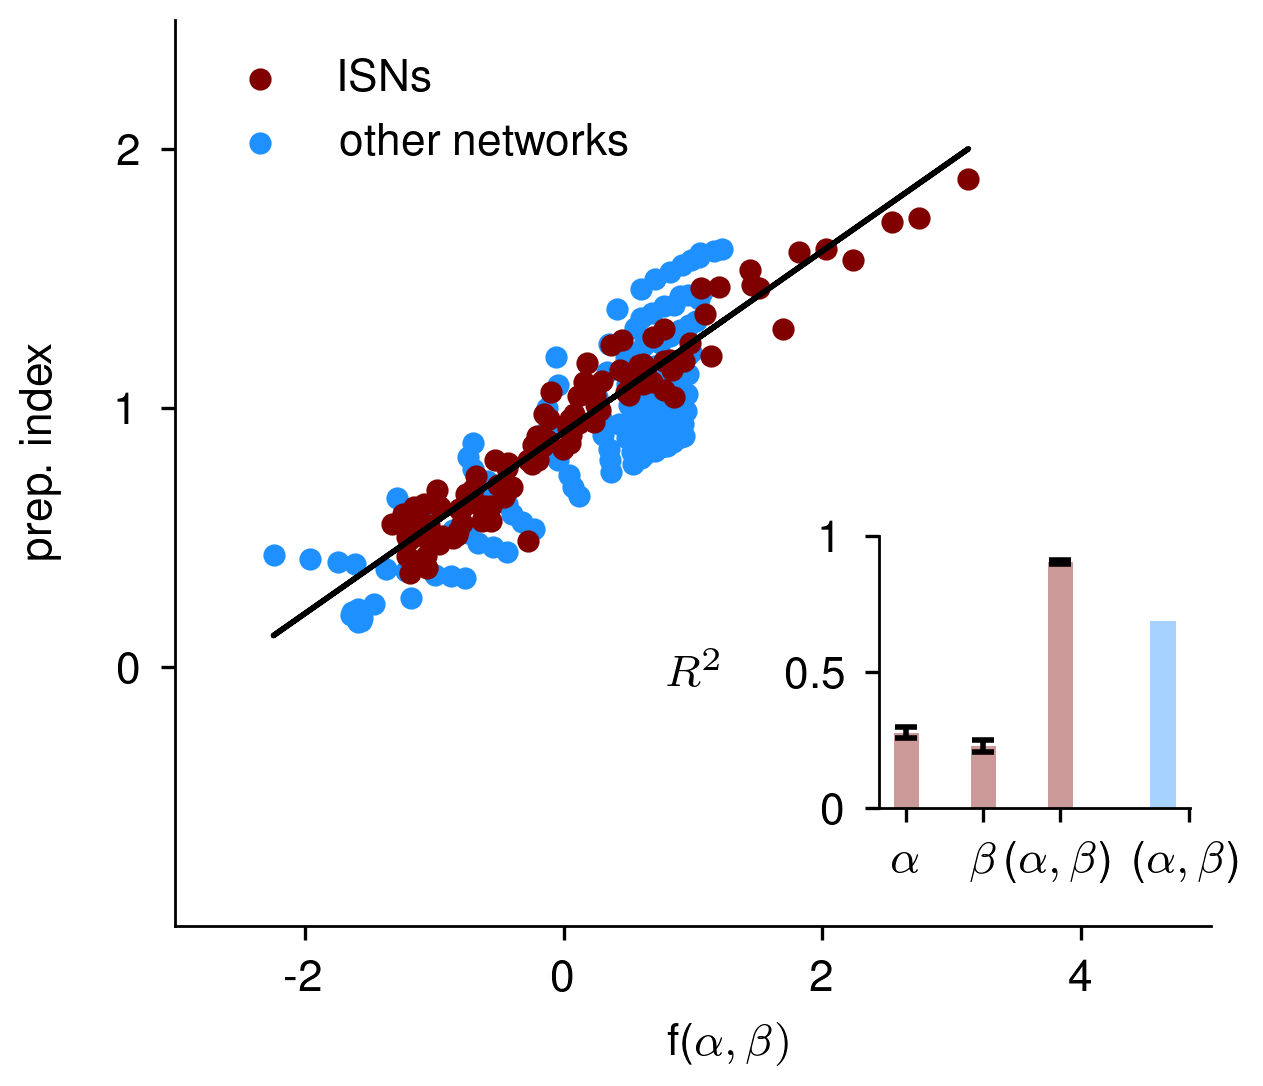

In [69]:
import scipy, sklearn
from sklearn.linear_model import LinearRegression
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

cmap_yr = sns.color_palette("YlOrBr", as_cmap=True)
reg_bg = LinearRegression().fit(z_bg_train, z_prep_train)
#w = np.linalg.solve((all_abg.T@all_abg + 1E-6 * np.eye((np.shape(all_abg)[1]))), all_abg.T@all_prep_idces)
w_bg = reg_bg.coef_.T
b_bg = reg_bg.intercept_
plt.figure(figsize = (4,3), dpi = 400)
plt.axes().set_aspect('equal')
plt.text(0.8, -4.5, "f($\\alpha, \\beta)$", size = fs)
plt.text(-4.2, -0.6, "prep. index", size = fs, rotation = "vertical")
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)
#####################
ax_1 =plt.gca().inset_axes([0.68, 0.13, 0.3, 0.3])
ax_1.bar(0, mean_b, yerr=sem_b, width = 0.2, color=color_soc, alpha = 0.4, ecolor='black', capsize=2,label="Prep.")
ax_1.bar(0.6, mean_g,  yerr=sem_g, width = 0.2, color=color_soc, alpha = 0.4, ecolor='black', capsize=2,label="Move")
ax_1.bar(1.2, mean_bg,  yerr=sem_bg,width = 0.2, color=color_soc, alpha = 0.4, ecolor='black', capsize=2,label="Move")
ax_1.bar(2.0, score_others,width = 0.2, color=color_skew, alpha = 0.4, ecolor='black', capsize=2,label="Move")
print(score_others)
ax_1.set_xticks([0, 0.6, 1.2, 2.2], ["$\\alpha$", "$\\beta$", "($\\alpha, \\beta$)", "($\\alpha, \\beta$)"], size = fs_m1)
ax_1.set_yticks([0, 0.5, 1], [0,0.5, 1], size = fs_m1)
#######################
plt.plot(bg@w_bg.T + b_bg,2*((bg@w_bg.T + b_bg)*std_p + mu_p) - 1.5, 'k')
plt.scatter(z_bg_test@w_bg.T + b_bg, 2*((z_prep_test)*std_p + mu_p) - 1.5, color = color_skew, label = "other networks")
plt.scatter(z_bg_train@w_bg.T + b_bg ,2*((z_prep_train*std_p + mu_p)) - 1.5,  color = color_soc, label = "ISNs")
ax =plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))
#axes[2,-1].axis('off')
plt.gca().set_yticks([-1.5,0.5,2.5], [0, 1, 2], size = fs_m1)
plt.gca().set_xlim(-3, 5)
plt.gca().set_xticks([-2, 0, 2, 4], [-2, 0, 2, 4], size = fs_m1)
########################
#fig.text(0.22, 0.2, "$\\textrm{z}_\\alpha$", size = fs)
#fig.text(0.08, 0.5, "$\\textrm{z}_\\beta$", size = fs, rotation = "vertical")

plt.text(0.8, -1.65, "$R^2$", size = fs)
plt.savefig("test_just_isn_big.pdf", bbox_inches="tight", dpi = 400)

In [65]:
bg = np.concatenate([z_bg_train, z_bg_test]).reshape(-1, 2)
pi = np.concatenate([z_prep_train, z_prep_test]).reshape(-1, 1)
##Bootstrapping : 
n_points = np.shape(bg)[0]
print(np.shape(pi))
slopes = []
intercepts = []
for i in range(1000):
    to_fit = np.random.choice(np.arange(n_points), n_points, replace=True)
    bg_to_fit = bg[to_fit]
    pi_to_fit = pi[to_fit]
    reg_bg_bs = LinearRegression().fit(bg_to_fit, pi_to_fit)
    slopes.append(reg_bg_bs.coef_)
    intercepts.append(reg_bg_bs.intercept_)

slopes = np.concatenate(slopes, axis=0)
intercepts = np.concatenate(intercepts, axis=0)
print(np.mean(slopes, axis=0), np.std(slopes, axis=0)/np.sqrt(1000))
print(np.mean(intercepts, axis=0), np.std(intercepts, axis=0))



(240, 1)
[ 16.92549685 -15.9582549 ] [0.02113994 0.02088434]
0.014916097668411466 0.04074839016262458


(25590, 9)
[0.38956818]
0.15891338065806193
[0.27373973]
0.8034427844900035


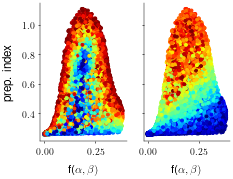

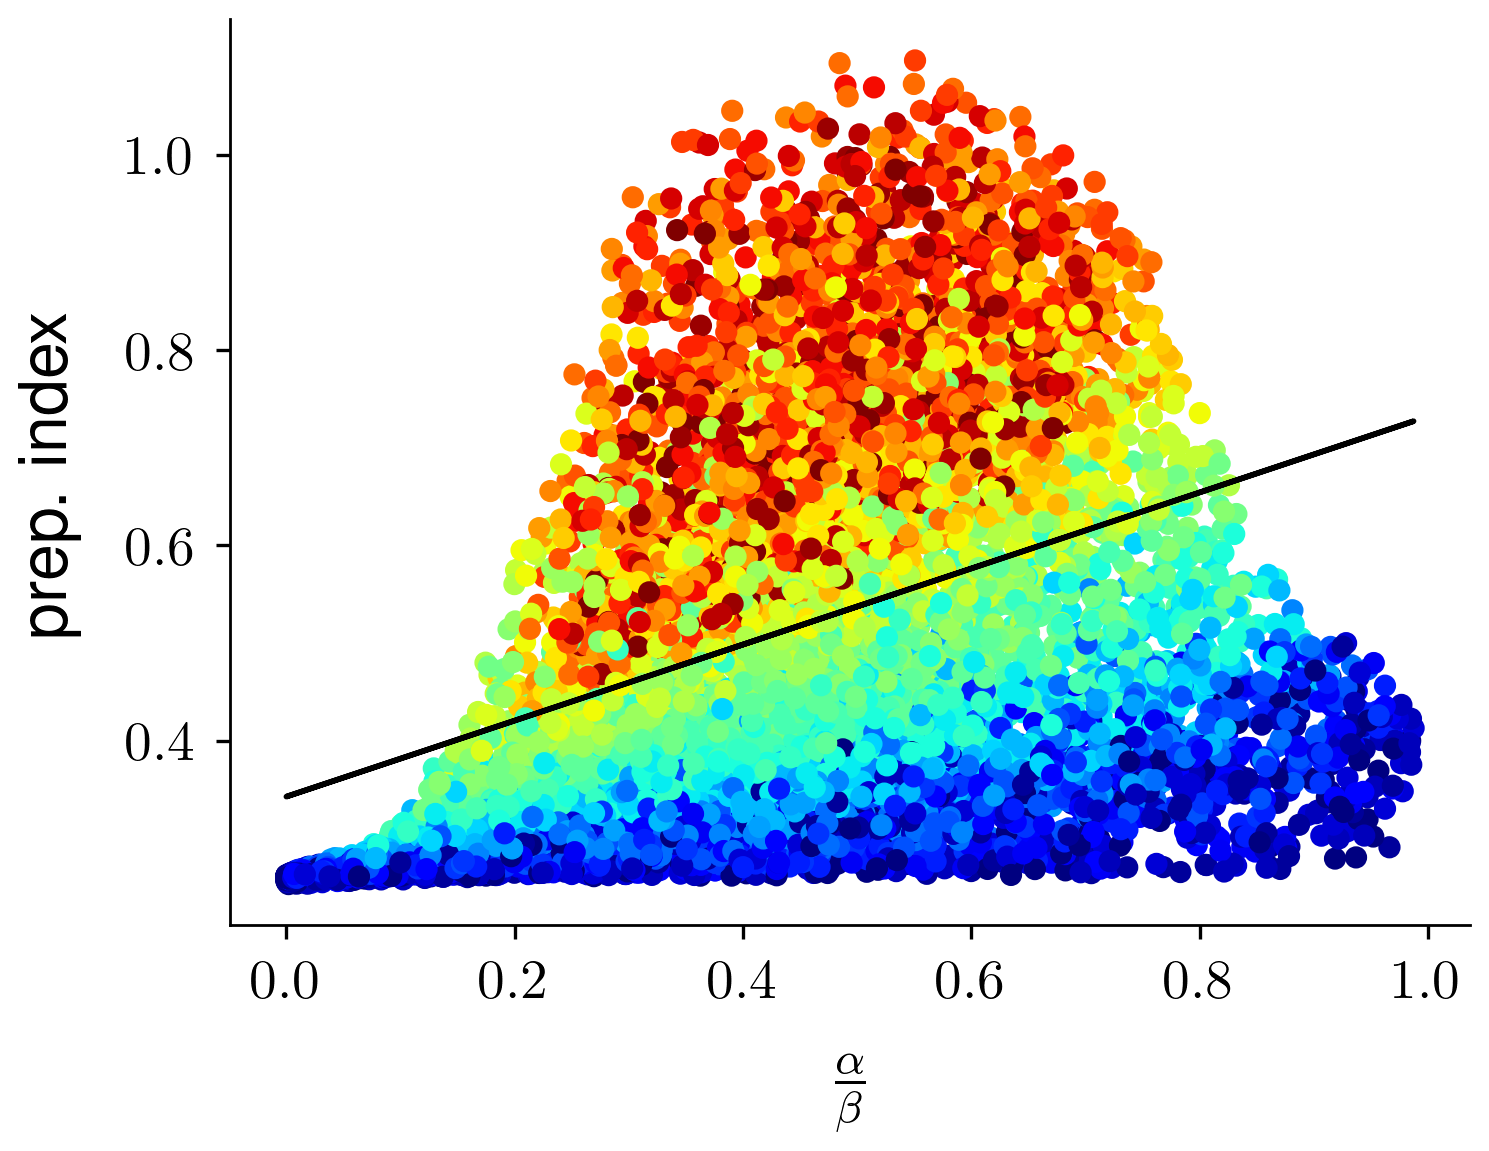

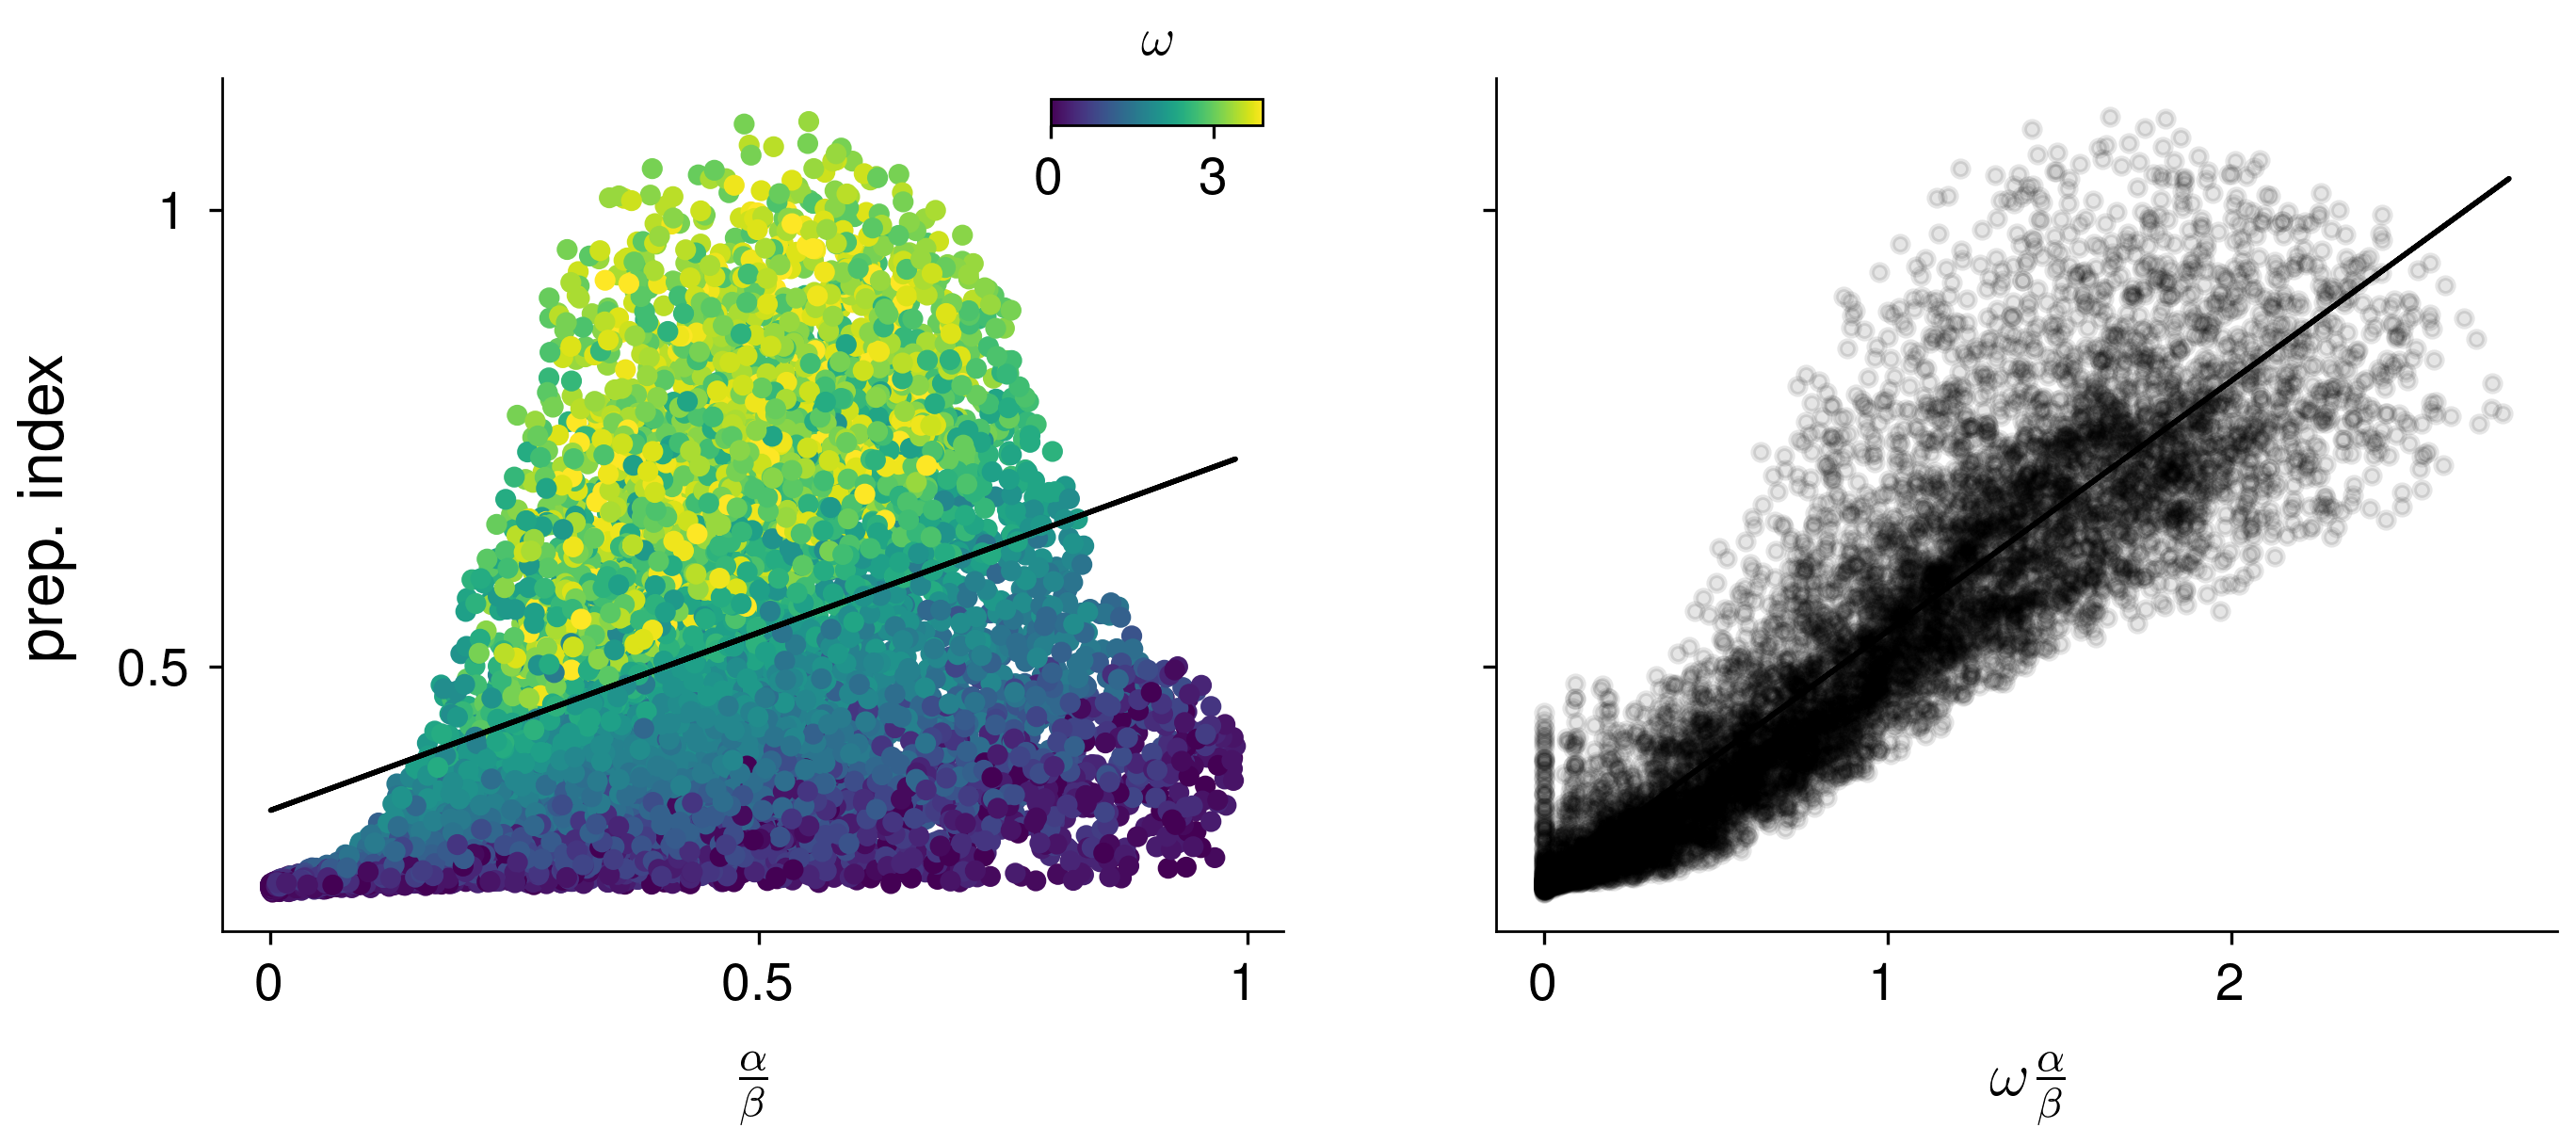

In [63]:
import scipy, sklearn
from sklearn.linear_model import LinearRegression
mini_preds = np.loadtxt("/home/mmcs3/code/why-prep-2/small_w_readout/ab_preds")

for i in np.arange(np.shape(mini_preds)[0]):
    b = mini_preds[i, 1] 
    mini_preds[i,1] =  mini_preds[i, 0] /b 

mini_preds = mini_preds[mini_preds[:,-4] < 0.8]
mini_preds = mini_preds[mini_preds[:,-2] < 4]
mini_preds = mini_preds[mini_preds[:,-3] < 4]
mini_preds = mini_preds[mini_preds[:,0] > 0.]
mini_preds = mini_preds[mini_preds[:,1] > 0.]
mini_preds0 = mini_preds
print(np.shape(mini_preds))
np.random.shuffle(mini_preds)
n = np.shape(mini_preds)[0]
mini_preds = mini_preds[:,[1, 2]]
def f(x):
    return x
mini_ab_train, mini_ab_test = f(mini_preds[:int(2*n/3),:-1]), f(mini_preds[int(n/3):,:-1])
mini_pi_train, mini_pi_test = f(mini_preds[:int(2*n/3),-1]), f(mini_preds[int(n/3):,-1])
mini_reg = LinearRegression().fit((mini_ab_train), (mini_pi_train))
print(mini_reg.coef_)
print(mini_reg.score((mini_ab_test), (mini_pi_test)))

fig, axes = plt.subplots(1,2, sharex = True, sharey = True)
#plt.scatter(mini_preds[:,0], mini_preds[:,-1])
axes[0].scatter(f(mini_preds[:,:-1])@mini_reg.coef_, f(mini_preds[:,-1]), c = mini_preds0[:,-2], cmap = "jet")
axes[1].scatter(f(mini_preds[:,:-1])@mini_reg.coef_, f(mini_preds[:,-1]), c = mini_preds0[:,-3], cmap = "jet")
axes[0].set_xlabel("f($\\alpha, \\beta)$")
axes[0].set_ylabel("prep. index")
axes[1].set_xlabel("f($\\alpha, \\beta)$")
plt.savefig("2d_check")

plt.figure(figsize = (4,3), dpi = 400)
plt.xlabel("$\\frac{\\alpha}{\\beta}$")
plt.ylabel("prep. index")
#plt.scatter(mini_preds[:int(2*n/3),0], mini_preds[:int(2*n/3),1], c = )
plt.scatter(mini_preds[int(2*n/3):,0], mini_preds[int(2*n/3):,1],  c = mini_preds0[int(2*n/3):,-3], cmap = "jet")
plt.plot(mini_preds[:,:-1], mini_preds[:,:-1]@mini_reg.coef_ + mini_reg.intercept_,"k")
plt.savefig("2D_preds_noim.pdf", bbox_inches="tight")


####################
mini_preds2 = np.loadtxt("/home/mmcs3/code/why-prep-2/small_w_readout/ab_preds")
mini_preds2 = mini_preds2[mini_preds2[:,-4] < 0.8]
mini_preds2 = mini_preds2[mini_preds2[:,-2] < 4]
mini_preds2 = mini_preds2[mini_preds2[:,-3] < 4]
mini_preds2 = mini_preds2[mini_preds2[:,0] > 0.]
mini_preds2 = mini_preds2[mini_preds2[:,1] > 0.]
for i in np.arange(np.shape(mini_preds2)[0]):
    b = mini_preds2[i, 1] 
    mini_preds2[i,1] =  mini_preds2[i, 0] /b *mini_preds2[i,-3]

#mini_preds2 = mini_preds2[mini_preds[:,-4] < 0.8]
#mini_preds2 = mini_preds2[mini_preds[:,-2] < 4]
#mini_preds2 = mini_preds2[mini_preds2[:,-3] < 4]
#mini_preds2 = mini_preds2[mini_preds[:,0] > 0.]
#mini_preds2 = mini_preds2[mini_preds[:,1] > 0.]
mini_preds1 = mini_preds2
np.random.shuffle(mini_preds2)
n = np.shape(mini_preds2)[0]
mini_preds2 = mini_preds2[:,[1, 2]]
def f(x):
    return x
mini_ab_train2, mini_ab_test2 = f(mini_preds2[:int(2*n/3),:-1]), f(mini_preds2[int(n/3):,:-1])
mini_pi_train2, mini_pi_test2 = f(mini_preds2[:int(2*n/3),-1]), f(mini_preds2[int(n/3):,-1])
mini_reg2 = LinearRegression().fit((mini_ab_train2), (mini_pi_train2))
print(mini_reg2.coef_)
print(mini_reg2.score((mini_ab_test2), (mini_pi_test2)))
####################
fig, axes = plt.subplots(1,2, figsize = (8,3), dpi = 400, sharey = True)
axes[0].set_xlabel("$\\frac{\\alpha}{\\beta}$")
axes[0].set_ylabel("prep. index")
axes[0].set_yticks([0,0.5,1], [0, 0.5, 1])
axes[1].set_xlabel("$\\omega \\frac{\\alpha}{\\beta}$")
im = axes[0].scatter(mini_preds[int(2*n/3):,0], mini_preds[int(2*n/3):,1],  c = mini_preds0[int(2*n/3):,-3], cmap = "viridis")
cbaxes = inset_axes(axes[0], width="20%", height="3%", loc=1) 
cbar = fig.colorbar(im, ax = axes[0], cax=cbaxes, ticks=[0.,3], orientation='horizontal')
cbar.ax.set_xticklabels([0,3])
#cbar.ax.set_label("$\\omega$")
axes[0].plot(mini_preds[:,:-1], mini_preds[:,:-1]@mini_reg.coef_ + mini_reg.intercept_,"k")
axes[1].plot(mini_preds2[:,:-1], mini_preds2[:,:-1]@mini_reg2.coef_ + mini_reg2.intercept_,"k")
axes[1].scatter(mini_preds2[int(2*n/3):,0], mini_preds2[int(2*n/3):,1], c = "k", alpha = 0.1)
axes[0].set_xticks([0,0.5,1], [0,0.5,1])
axes[1].set_xticks([0,1,2], [0,1,2])
fig.text(0.43, 0.9, "$\\omega$")
fig.savefig("double_2D_pred.pdf", bbox_inches="tight")



/tmp/ipykernel_259565/436118423.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  frac1 = 1/((omega - im)**2 + re**2)
/tmp/ipykernel_259565/436118423.py:4: RuntimeWarning: invalid value encountered in double_scalars
  frac3 = frac1*frac2*(wff**2)


ValueError: x and y must be the same size

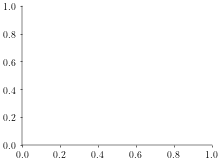

In [ ]:
def power(re, im, wff, omega):
    frac1 = 1/((omega - im)**2 + re**2) 
    frac2 = 1/((omega + im)**2 + re**2)
    frac3 = frac1*frac2*(wff**2)
    return frac1 + frac2 + frac3 

mini_preds = np.loadtxt("/home/mmcs3/code/why-prep-2/small_w_readout/ab_preds")
power1 = np.asarray([power( mini_preds[i, -4], mini_preds[i, -3], mini_preds[i,-2], 1) for i in range(32000)])
plt.scatter(np.arange(1600), power1)


powers = [power(-1, 1, 3, omega) for omega in np.logspace(0, 3)]

print(power(-1, 3, 1, 1))
    

[0.0269663 0.075     0.389592 ]


IndexError: index -5 is out of bounds for axis 1 with size 3

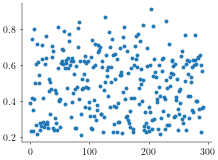

<Figure size 245x183.75 with 0 Axes>

In [ ]:
print(mini_preds[0])
plt.scatter(np.arange(n), (mini_preds[:,-1]))
plt.figure()
plt.scatter(np.arange(n), (mini_preds[:,-5]/mini_preds[:,-4]))

(1600, 450, 4)
(400, 450, 4)


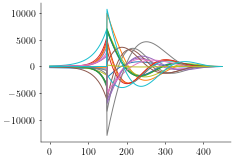

In [ ]:
taus = np.load("/home/mmcs3/code/why-prep-2/test2/taus")
mini_preds = np.loadtxt("/home/mmcs3/code/why-prep-2/test2/ab_preds")
print(taus.shape)
taus = taus[mini_preds[:,-3] < 1]
print(taus.shape)
500/5
for i in range(10):
    plt.plot(taus[i,:,2:])
    #plt.figure()


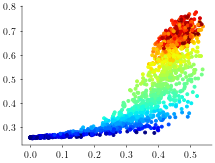

In [ ]:
mini_preds = np.loadtxt("/home/mmcs3/code/why-prep-2/small_w_readout/ab_preds")
mini_preds = mini_preds[mini_preds[:,-4] < 0.2]
mini_preds = mini_preds[mini_preds[:,-2] < 1]
mini_preds = np.random.permutation(mini_preds)
plt.scatter(mini_preds[:,0]/mini_preds[:,1], mini_preds[:,2], c = mini_preds[:,-3], cmap = "jet")

In [ ]:
######Analyses #########


def transfo_b(b):
    return b

def transfo_g(g):
    return g

def transfo_a(a):
    return 0*a + 1


def transfo_d(a):
    return 0*np.log(a)

def transfo_prep(p):
    p = np.asarray([pi for pi in p])
    return p

    
n = all_prep_idces.shape[0]
shuffled_idces = np.random.permutation(np.arange(n))
train_idces, test_idces = shuffled_idces[:int(n/2)], shuffled_idces[int(n/2):]
p_soc, p_skew, p_rdn = transfo_prep(prep_idces), transfo_prep(prep_idces_skew), transfo_prep(prep_idces_rdn)
g_soc, g_skew, g_rdn =transfo_g(soc_alphas_c_binned), transfo_g(skew_alphas_c_binned), transfo_g(rdn_alphas_c_binned)
a_soc, a_skew, a_rdn = transfo_a(soc_alphas_binned), transfo_a(skew_alphas_binned), transfo_a(rdn_alphas_c_binned)
b_soc, b_skew, b_rdn = transfo_b(soc_betas_binned), transfo_b(skew_betas_binned), transfo_b(rdn_betas_binned)
all_prep_idces = np.concatenate([p_soc, p_skew, p_rdn])[:,None]
z_prep_train = all_prep_idces[train_idces,:]
z_prep_test = all_prep_idces[test_idces,:]
z_prep= (all_prep_idces)
all_gammas = np.concatenate([g_soc, g_skew, g_rdn])
z_gamma_train = all_gammas[train_idces]
z_gamma_test = all_gammas[test_idces]
all_alphas = np.concatenate([a_soc, a_skew, a_rdn])

all_betas = np.concatenate([b_soc/g_soc, b_skew/g_skew, b_rdn/g_rdn])
z_beta_train = all_betas[train_idces] 
z_beta_test = all_betas[test_idces]
z_abg_train = np.concatenate([z_beta_train[:,None], z_alpha_train[:,None], z_gamma_train[:,None]], axis=1)
z_b_train = np.concatenate([z_beta_train[:,None]], axis=1)
z_g_train = np.concatenate([z_gamma_train[:,None]], axis=1)
z_bg_train = np.concatenate([z_beta_train[:,None], z_gamma_train[:,None]], axis=1)
########
z_abg_test = np.concatenate([z_beta_test[:,None], z_alpha_test[:,None], z_gamma_test[:,None]], axis=1)
z_b_test = np.concatenate([z_beta_test[:,None]], axis=1)
z_g_test = np.concatenate([z_gamma_test[:,None]], axis=1)
z_bg_test = np.concatenate([z_beta_test[:,None], z_gamma_test[:,None]], axis=1)

print(np.mean(all_betas), np.std(all_betas), np.mean(all_gammas), np.std(all_gammas))
######
z_b = (all_betas - np.mean(all_betas))/np.std(all_betas)
z_g = (all_gammas - np.mean(all_gammas))/np.std(all_gammas)


cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
reg = LinearRegression()
reg_bg = LinearRegression().fit(z_bg_train, z_prep_train)
print(reg_bg.coef_, reg_bg.intercept_, reg_bg.score(z_bg_test, z_prep_test))
